# Experiment 5-6 19bcs6072

importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
import math

reading the csv file

In [2]:
data=pd.read_csv('bank-full.csv',sep=';')
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


Checking for any null or nan values in the dataset

<AxesSubplot:>

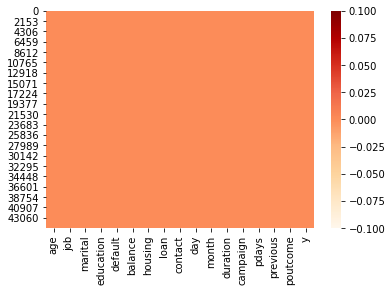

In [3]:
sns.heatmap(data.isnull(),cmap='OrRd')

In [7]:
data['default'].value_counts()

no     44396
yes      815
Name: default, dtype: int64

In [6]:
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [7]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


analysing categorical and numerical variables

In [8]:
cat_columns = ['job','marital','education','default','housing','loan','contact','month','poutcome']
num_columns = ['age','campaign','pdays','previous']

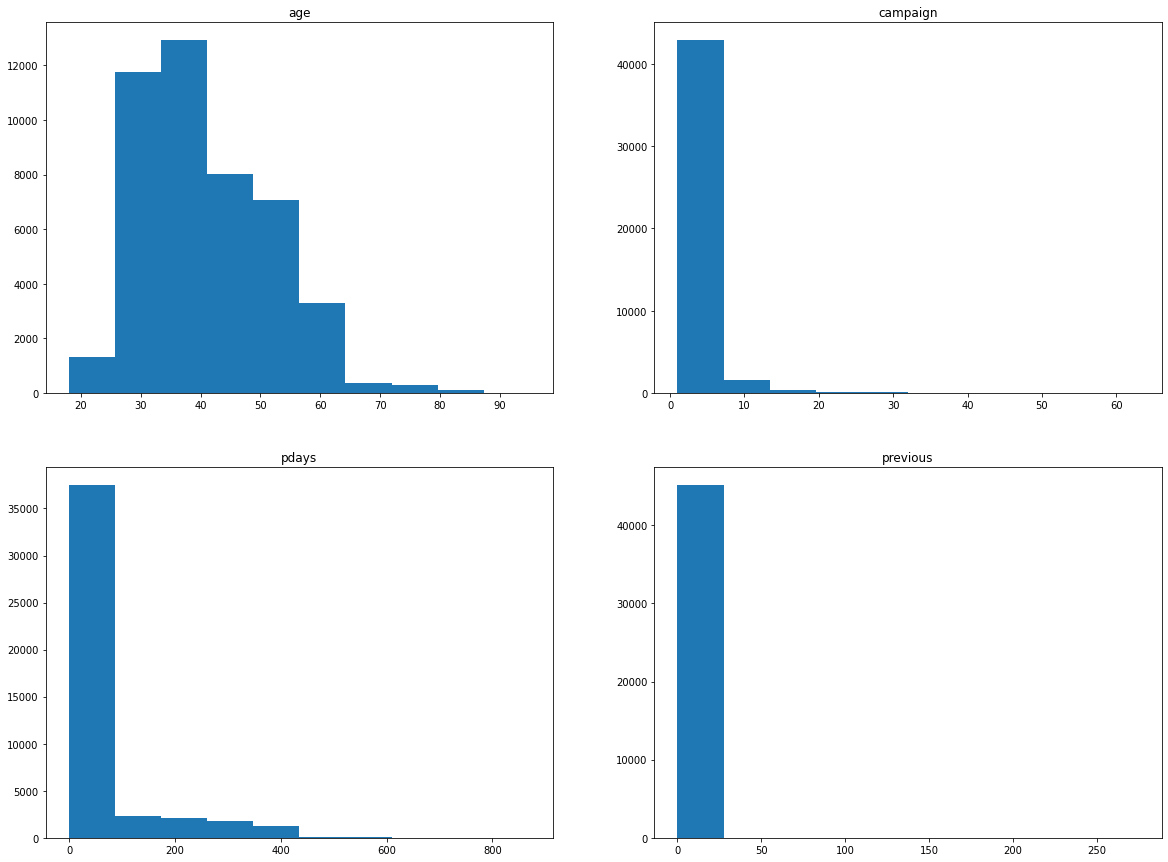

In [9]:
fig, axs = plt.subplots(2, 2, sharex=False, sharey=False, figsize=(20,15))
i=0
for num in num_columns:
    trace_x = i // 2
    trace_y = i % 2
    axs[trace_x, trace_y].hist(data[num])
    axs[trace_x, trace_y].set_title(num)
    i+=1
plt.show()

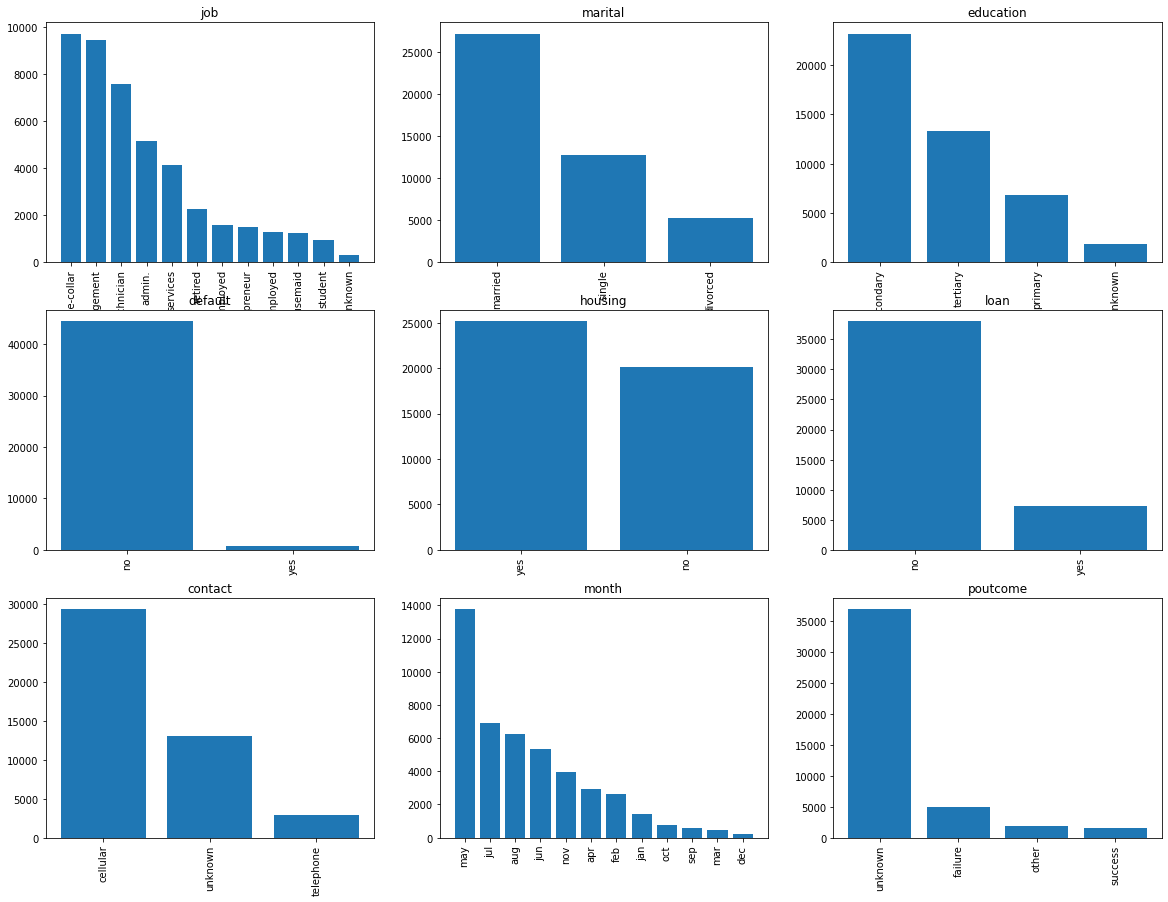

In [10]:
fig, axs = plt.subplots(3, 3, sharex=False, sharey=False, figsize=(20,15))

i=0
for cat in cat_columns:
    value_counts=data[cat].value_counts()
    trace_x = i // 3
    trace_y = i % 3
    x_pos=np.arange(0,len(value_counts))
    
    axs[trace_x, trace_y].bar(x_pos, value_counts.values,tick_label = value_counts.index)
    axs[trace_x, trace_y].set_title(cat)
    
    for tick in axs[trace_x, trace_y].get_xticklabels():
        tick.set_rotation(90)
    i+=1
plt.show()

In [11]:
data[['pdays','campaign','previous']].describe()

,pdays,campaign,previous
count,45211.000000,45211.000000,45211.000000
mean,40.197828,2.763841,0.580323
std,100.128746,3.098021,2.303441
min,-1.000000,1.000000,0.000000
25%,-1.000000,1.000000,0.000000
50%,-1.000000,2.000000,0.000000
75%,-1.000000,3.000000,0.000000
max,871.000000,63.000000,275.000000


<AxesSubplot:title={'center':'loan value counts'}>

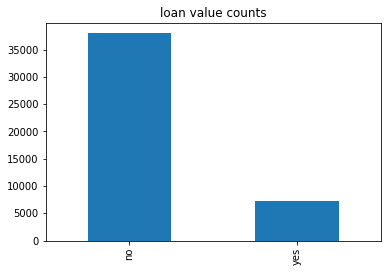

In [12]:
value_counts = data['loan'].value_counts()
value_counts.plot.bar(title = 'loan value counts')

<AxesSubplot:title={'center':'age'}>

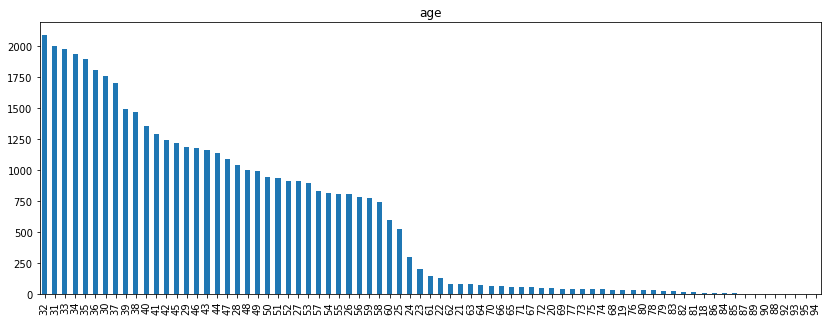

In [83]:
value_counts = data['age'].value_counts()

value_counts.plot.bar(title = 'age',figsize=(14,5))


Creating the dummy values for categorical variables and removing the columns which are nit important

In [14]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
cat_columns = ['job','marital','education','contact','month','poutcome','default','housing','loan']
for cat in cat_columns:
    data=pd.concat([data.drop(cat, axis=1),
    pd.get_dummies(data[cat],prefix=cat,prefix_sep='_',drop_first=True, dummy_na=False)],axis=1)
data.head()

,age,balance,day,duration,campaign,pdays,previous,y,job_blue-collar,job_entrepreneur,...,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,default_yes,housing_yes,loan_yes
0,58,2143,5,261,1,-1,0,no,0,0,...,1,0,0,0,0,0,1,0,1,0
1,44,29,5,151,1,-1,0,no,0,0,...,1,0,0,0,0,0,1,0,1,0
2,33,2,5,76,1,-1,0,no,0,1,...,1,0,0,0,0,0,1,0,1,1
3,47,1506,5,92,1,-1,0,no,1,0,...,1,0,0,0,0,0,1,0,1,0
4,33,1,5,198,1,-1,0,no,0,0,...,1,0,0,0,0,0,1,0,0,0


In [15]:
data.columns

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous',
       'y', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_married', 'marital_single', 'education_secondary',
       'education_tertiary', 'education_unknown', 'contact_telephone',
       'contact_unknown', 'month_aug', 'month_dec', 'month_feb', 'month_jan',
       'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov',
       'month_oct', 'month_sep', 'poutcome_other', 'poutcome_success',
       'poutcome_unknown', 'default_yes', 'housing_yes', 'loan_yes'],
      dtype='object')

In [16]:
data.shape

(45211, 43)

In [17]:
y=data.y

In [18]:
y.value_counts()

no     39922
yes     5289
Name: y, dtype: int64

In [19]:
X=data.drop(['y'], axis=1)

In [20]:
X.head()

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,default_yes,housing_yes,loan_yes
0,58,2143,5,261,1,-1,0,0,0,0,...,1,0,0,0,0,0,1,0,1,0
1,44,29,5,151,1,-1,0,0,0,0,...,1,0,0,0,0,0,1,0,1,0
2,33,2,5,76,1,-1,0,0,1,0,...,1,0,0,0,0,0,1,0,1,1
3,47,1506,5,92,1,-1,0,1,0,0,...,1,0,0,0,0,0,1,0,1,0
4,33,1,5,198,1,-1,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0


Logistic Regression, Balancing by spliting the dataset 

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [44]:
from sklearn.model_selection import StratifiedKFold, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import fbeta_score
from sklearn import metrics


skf = StratifiedKFold(n_splits = 5)

skf.get_n_splits(X, y)

accs, fsc, fb = [], [], []

print(skf)

StratifiedKFold(n_splits=10, random_state=10, shuffle=True)
for train_index,test_index in skf.split(X, y):
    
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    clf=LogisticRegression(random_state=0).fit(X_train,y_train)
    
    clf=clf.fit(X_train,y_train)
    
    y_pred=clf.predict(X_test)
    
    print("Fold Accuracy: ",metrics.accuracy_score(y_test,y_pred))
    
    print("Fold fbeta_score: ",fbeta_score(y_test,y_pred,average='macro',beta=0.5))

StratifiedKFold(n_splits=5, random_state=None, shuffle=False)


C:\Users\hp\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\hp\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-lea

Fold Accuracy:  0.8983744332632976
Fold fbeta_score:  0.6957748772592987


C:\Users\hp\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\hp\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-lea

Fold Accuracy:  0.8943817739438178
Fold fbeta_score:  0.701891888004003


C:\Users\hp\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\hp\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-lea

Fold Accuracy:  0.8854235788542358
Fold fbeta_score:  0.6447317794449436


C:\Users\hp\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\hp\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-lea

Fold Accuracy:  0.8625304136253041
Fold fbeta_score:  0.6113738623628955


C:\Users\hp\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\hp\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-lea

Fold Accuracy:  0.8743640787436407
Fold fbeta_score:  0.6820848087071419


In [45]:
clf.score(X_train,y_train)

0.8999695872155713

In [46]:
clf.score(X_test,y_test)*100

87.43640787436408

In [47]:
clf.coef_

array([[-1.24371418e-02,  2.27339037e-05, -2.21505657e-02,
         4.26583253e-03, -1.47574642e-01,  1.93233387e-03,
         2.37701330e-02, -4.38819870e-01, -4.79256956e-02,
        -2.08184233e-02,  2.48011852e-02,  2.86034582e-01,
        -3.09038015e-02, -1.56891717e-01,  9.10775925e-02,
        -1.17526802e-01, -9.91001221e-03,  4.67015851e-03,
        -3.61471595e-01, -1.26903415e-01, -4.58871236e-01,
         1.34359188e-01,  1.28223397e-02,  1.13709955e-01,
        -1.00863212e+00,  5.13981061e-02,  8.65994076e-02,
        -6.46712916e-02, -2.20018416e-02, -2.78065626e-01,
        -1.25850049e-01,  1.12827170e-01, -3.06281127e-01,
        -1.57563303e-01,  2.24164081e-01,  1.11108912e-01,
        -3.60590272e-02,  4.13217919e-01, -6.73212358e-01,
        -3.13502779e-02, -1.08962125e+00, -3.68839368e-01]])

In [48]:
clf.intercept_

array([-0.44432053])

In [49]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[7498,  486],
       [ 650,  408]], dtype=int64)

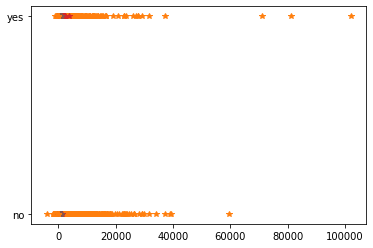

In [50]:
plt.plot(X_test,y_pred,'*')

# NAive Bayes implementation 

In [55]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.model_selection import StratifiedKFold, KFold
from sklearn.metrics import confusion_matrix
from sklearn.metrics import fbeta_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
gnb = GaussianNB()
fb=[]
accs, fsc = [], []
skf = StratifiedKFold(n_splits=5)
skf.get_n_splits(X, y)

for train_index, test_index in skf.split(X, y):
    print("TRAIN: ", train_index, "TEST: ", test_index)
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    y_pred = gnb.fit(X_train, y_train).predict(X_test)
    
    fb=fbeta_score(y_test, y_pred, average='macro', beta=0.5)
print(confusion_matrix(y_test, y_pred))

TRAIN:  [ 8254  8255  8256 ... 45208 45209 45210] TEST:  [    0     1     2 ... 21884 21909 21924]
TRAIN:  [    0     1     2 ... 45208 45209 45210] TEST:  [ 8254  8255  8256 ... 33809 33815 33818]
TRAIN:  [    0     1     2 ... 45208 45209 45210] TEST:  [16701 16702 16703 ... 40710 40718 40719]
TRAIN:  [    0     1     2 ... 45208 45209 45210] TEST:  [25196 25197 25198 ... 43174 43175 43176]
TRAIN:  [    0     1     2 ... 43174 43175 43176] TEST:  [34226 34227 34228 ... 45208 45209 45210]
[[4239 3745]
 [ 191  867]]
